In [1]:
from pyspark.sql import SparkSession
PYARROW_IGNORE_TIMEZONE=1
spark = SparkSession.builder \
      .appName("Dataproc Interactive Demo") \
      .getOrCreate() 


23/09/27 19:09:23 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
input_df = spark.read.option("header", True).csv('gs://djsoltani-notebooks/public-data/3416438.csv')

In [3]:
from pyspark.sql.types import IntegerType, BooleanType, DateType
df = input_df.select(input_df.DATE.cast('date'), input_df.TMAX.cast('int'), input_df.TMIN.cast('int'))


In [4]:
df.show()
df.describe

+----------+----+----+
|      DATE|TMAX|TMIN|
+----------+----+----+
|1945-07-01|  74|  54|
|1945-07-02|  71|  54|
|1945-07-03|  72|  55|
|1945-07-04|  72|  54|
|1945-07-05|  66|  55|
|1945-07-06|  65|  54|
|1945-07-07|  68|  54|
|1945-07-08|  69|  53|
|1945-07-09|  66|  56|
|1945-07-10|  69|  54|
|1945-07-11|  65|  55|
|1945-07-12|  65|  56|
|1945-07-13|  64|  55|
|1945-07-14|  66|  54|
|1945-07-15|  70|  53|
|1945-07-16|  74|  52|
|1945-07-17|  77|  51|
|1945-07-18|  64|  54|
|1945-07-19|  64|  54|
|1945-07-20|  76|  49|
+----------+----+----+
only showing top 20 rows



<bound method DataFrame.describe of DataFrame[DATE: date, TMAX: int, TMIN: int]>

In [5]:
hot_days = df[df.TMAX >= 90]
hot_days.show()

+----------+----+----+
|      DATE|TMAX|TMIN|
+----------+----+----+
|1946-08-02|  91|  54|
|1946-09-19|  91|  57|
|1946-09-22|  91|  55|
|1946-09-28|  91|  54|
|1947-06-22|  91|  53|
|1947-09-20|  92|  48|
|1947-09-21|  94|  57|
|1949-06-04|  92|  66|
|1950-05-29|  92|  48|
|1950-08-15|  90|  50|
|1950-09-01|  90|  51|
|1950-09-02|  93|  56|
|1950-09-03|  91|  56|
|1951-09-08|  93|  53|
|1951-09-09|  92|  53|
|1952-09-01|  93|  56|
|1953-09-12|  90|  58|
|1953-09-13|  94|  63|
|1954-09-24|  91|  49|
|1954-09-25|  90|  53|
+----------+----+----+
only showing top 20 rows



In [6]:
from pyspark.sql.functions import col, year
hot_days = hot_days.withColumn('YEAR', year('DATE')).groupBy('YEAR').count()
hot_days.collect()

[Row(YEAR=2015, count=7),
 Row(YEAR=2022, count=5),
 Row(YEAR=2014, count=8),
 Row(YEAR=2019, count=9),
 Row(YEAR=2020, count=12),
 Row(YEAR=2012, count=2),
 Row(YEAR=2009, count=5),
 Row(YEAR=2016, count=2),
 Row(YEAR=2010, count=9),
 Row(YEAR=2011, count=2),
 Row(YEAR=2008, count=8),
 Row(YEAR=2017, count=5),
 Row(YEAR=2021, count=2),
 Row(YEAR=1959, count=4),
 Row(YEAR=1990, count=2),
 Row(YEAR=1975, count=2),
 Row(YEAR=1977, count=3),
 Row(YEAR=2003, count=7),
 Row(YEAR=1974, count=1),
 Row(YEAR=1955, count=2),
 Row(YEAR=2006, count=2),
 Row(YEAR=1978, count=4),
 Row(YEAR=1961, count=11),
 Row(YEAR=1952, count=1),
 Row(YEAR=1956, count=4),
 Row(YEAR=1988, count=5),
 Row(YEAR=1997, count=4),
 Row(YEAR=1994, count=1),
 Row(YEAR=1968, count=3),
 Row(YEAR=1951, count=2),
 Row(YEAR=1973, count=6),
 Row(YEAR=1979, count=4),
 Row(YEAR=1946, count=4),
 Row(YEAR=1947, count=3),
 Row(YEAR=1971, count=5),
 Row(YEAR=1950, count=5),
 Row(YEAR=1949, count=1),
 Row(YEAR=1966, count=4),
 Row(YEAR=

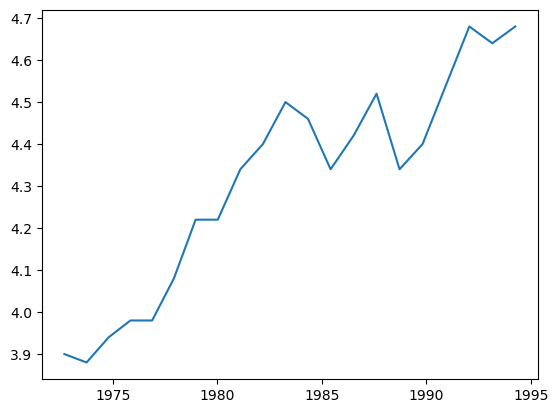

In [7]:
import matplotlib.pyplot as plt
hot_days_pd = hot_days.toPandas().sort_values(['YEAR']).rolling(window = 50).mean()
plt.plot(hot_days_pd.YEAR, hot_days_pd['count'])
plt.show()